In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [24]:
#This will be the true mean for our arms and we will create the distributions for each arm using the mean coresponding to that arm.
#Variance remains 1, for reward distribution of the arm.
true_mean_for_ten_arms=np.random.randn(10)

#number of possible rewards in each distribution:-
n=500
#Now we generate each arms reward distribution(10000 values per arm).
reward= np.zeros((10,n))


for i in range(10):
    for j in range(n):
        reward[i][j]= true_mean_for_ten_arms[i] + np.random.randn()


# UCB for c=2

In [40]:
C=[2,1,4]
avg_list_for_c=[]

for excercise in range(3):
    
    c= C[excercise]
    steps=1000

    Rt_for_every_player=np.zeros((2000,1000))

    for player in range(2000):


        Q= [0]*10
        N= [0]*10   
        #Let's take first 10 steps to pick every arm once to make Nt(a) non zero.
        for k in range(10):
            Rt= reward[k][np.random.randint(n)]
            Q[k]= Rt
            N[k]+=1
            Rt_for_every_player[player][k]=Rt



        for t in range(10,1000):     

            vals=[]

            for k in range(10):

                term= Q[k] + (c*np.sqrt( np.log(t)/N[k]) )
                vals.append(term)


            At= np.argmax(vals)

            Rt= reward[At][np.random.randint(n)]


            Q[At]=(Rt+(Q[At]*N[At]))/(N[At]+1)
            N[At]+=1


            #Note the reward received at time 't' for every player.
            Rt_for_every_player[player][t]=Rt



    #We need average reward for every time step.
    average_reward_list=[]
    for t in range(steps):
        total_reward_at_t=0
        for player in range(2000):

            total_reward_at_t+=Rt_for_every_player[player][t]


        average_reward_at_t= total_reward_at_t/2000

        average_reward_list.append(average_reward_at_t)

    avg_list_for_c.append(average_reward_list)



# Greedy epsilon for e=0.1

In [34]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.1

#Let's maintain a Q value list and a number of times an arm is picked list, which is for all 2000 trials.
R_time_2=np.zeros((10,1000)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time_2=np.zeros((10,1000)) #Number of times, an arm is picked at time 't' over all 2000 trials.


#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_2= np.zeros((2000,1000))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)

#The main algo begins
for player in range(2000):
    N=[0]*10
    Q=[0]*10
    for t in range(1000):

        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)


        #Each arm has n values in its distribution and we need to randomly pick one.

        #Now we got our reward at time step t.
        Rt= reward[arm_to_pick][np.random.randint(n)]

        #Now we update the Q value for this arm which we picked

        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_2[player][t]=Rt


        #For plotting expected value for every arm as a function of time steps.
        R_time_2[arm_to_pick][t]+=Rt
        N_time_2[arm_to_pick][t]+=1
        
        
#We need average reward for every time step.
average_reward_list_2=[]
for t in range(1000):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_2[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_2.append(average_reward_at_t)


# Figure 2.4

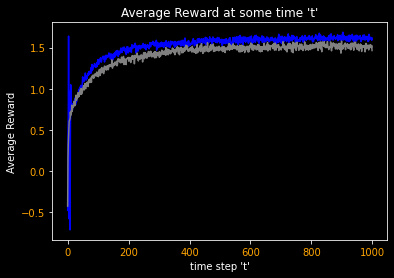

In [44]:
plt.style.use('dark_background')

plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
# plt.ylim(0,3)
plt.plot(range(1000), avg_list_for_c[0], color='blue', label='c=2')
plt.plot(range(1000), average_reward_list_2, color='gray', label='c=2')


# Fig 2.4 for c=1

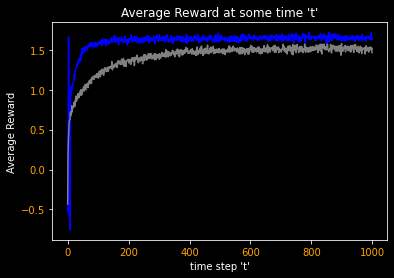

In [45]:
plt.style.use('dark_background')

plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
# plt.ylim(0,3)
plt.plot(range(1000),avg_list_for_c[1] , color='blue', label='c=2')
plt.plot(range(1000), average_reward_list_2, color='gray', label='c=2')


# Fig 2.4 for c=4

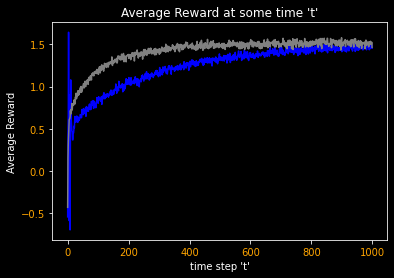

In [46]:
plt.style.use('dark_background')

plt.figure(2.2)

plt.title("Average Reward at some time 't'")
plt.xlabel("time step 't'")
plt.ylabel('Average Reward')
plt.xticks(color='orange')
plt.yticks(color='orange')
# plt.ylim(0,3)
plt.plot(range(1000),avg_list_for_c[2] , color='blue', label='c=2')
plt.plot(range(1000), average_reward_list_2, color='gray', label='c=2')
